In [7]:
import os
import sys 
sys.path.append(os.path.abspath('..'))
sys.path.append(os.path.abspath('../../latent_analysis/'))
sys.path.append(os.path.abspath('../../dPCA/python/'))
import LTransform as LT
from dPCA import dPCA
from pathlib import Path
from model import test
from get_utils import get_hidden, get_dir
import numpy as np
import torch as th
import plot as plot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Load hidden
folder_name = 'loss26'
model_num = 0
model_name = "model{:02d}".format(model_num)

ff_coef = [0,8,0,8]
phase = ['NF1','FF1','NF2','FF2']

data = get_hidden(folder_name,model_name,phase,ff_coef,demean=True)

In [9]:
# Run PCA
transform = LT.Transform(num_latent=5)
transform.fit(data[0],method='PCA') # fit on NF1
X_ld=[]
for i in range(4):
    X_ld.append(transform.transform(data[i],ensure_orthogonality=True))

In [10]:
%matplotlib qt
fig,ax = plt.subplots(1,2,figsize=(10,5),subplot_kw={'projection': '3d'})
plot.plot_traj(ax[0],X_ld,which_times=[10],plot_scatter=1,dim=2)
#fig, ax = plot.plot_traj([X_ld[0], X_ld[1]],which_times=list(range(0,10)),plot_scatter=0)

In [8]:
X = np.concatenate((all_hidden[0][:,None,:24,:],all_hidden[1][:,None,:24,:]), axis=1)

# make it:
# neurons x conditions x learning phase x time
R = X.transpose(3,0,1,2)
dims = R.shape
# centre data
R -= np.mean(R.reshape((dims[0],-1)),1)[:,None,None,None]

# fit
dpca = dPCA.dPCA(labels='clt',join={'ct':['c','ct'], 'lt':['l','lt'], 'clt':['cl','clt']}, n_components=6)
dpca.protect = ['t']
Z = dpca.fit_transform(R)
#dpca.fit(R)

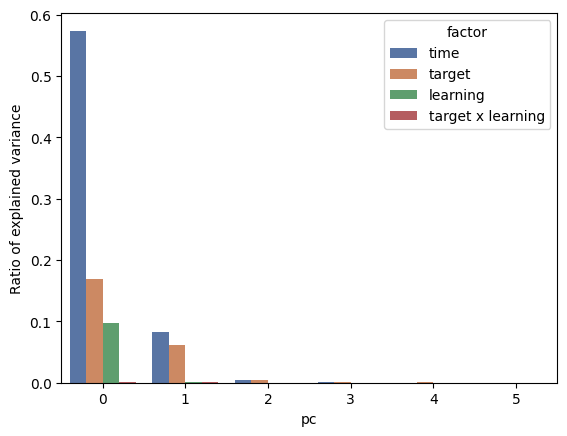

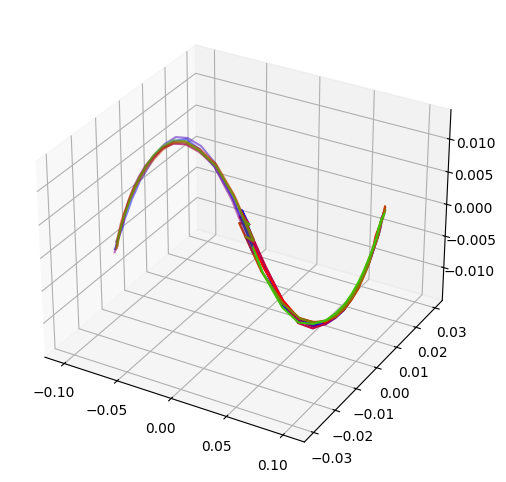

In [13]:
var_explained_df = pd.DataFrame(columns=['factor', 'pc', 'variance_explained'])
counter = 0
good_names=['time','target','learning','target x learning']
for i,name in enumerate(dpca.explained_variance_ratio_.keys()):
    for c in range(dpca.n_components):
        var_explained_df.loc[counter] = {'factor': good_names[i], 'pc': c, 'variance_explained': dpca.explained_variance_ratio_[name][c]}
        counter += 1

fig,ax = plt.subplots()
sns.barplot(var_explained_df, x='pc', y='variance_explained', hue='factor', palette=sns.color_palette('deep',4))
ax.set_ylabel('Ratio of explained variance')
#fig.savefig(os.path.join(data_dir,'varexplained.png'),dpi=300)

x_1 = Z['lt'][:,:,0,:].transpose(1,2,0)
x_2 = Z['lt'][:,:,1,:].transpose(1,2,0)
fig, ax = plot.plot_traj([x_1, x_2],which_times=list(range(0,24)),plot_scatter=0,dim=3)

In [17]:
# conditions x time x units
area = 'S1'
X = np.concatenate((all_hidden_decomp[0][area][:,None,:12,:],all_hidden_decomp[1][area][:,None,:12,:]), axis=1)


# make it:
# neurons x conditions x learning phase x time
R = X.transpose(3,0,1,2)
dims = R.shape
# centre data
R -= np.mean(R.reshape((dims[0],-1)),1)[:,None,None,None]

# fit
dpca = dPCA.dPCA(labels='clt',join={'ct':['c','ct'], 'lt':['l','lt'], 'clt':['cl','clt']}, n_components=6)
dpca.protect = ['t']
Z = dpca.fit_transform(R)
#dpca.fit(R)

Text(0, 0.5, 'Ratio of explained variance')

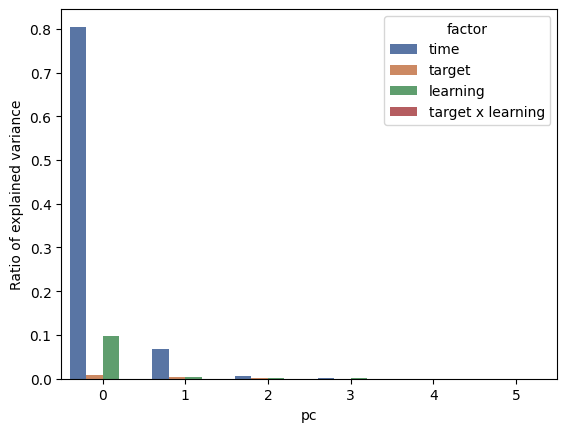

In [18]:
var_explained_df = pd.DataFrame(columns=['factor', 'pc', 'variance_explained'])
counter = 0
good_names=['time','target','learning','target x learning']
for i,name in enumerate(dpca.explained_variance_ratio_.keys()):
    for c in range(dpca.n_components):
        var_explained_df.loc[counter] = {'factor': good_names[i], 'pc': c, 'variance_explained': dpca.explained_variance_ratio_[name][c]}
        counter += 1

fig,ax = plt.subplots()
sns.barplot(var_explained_df, x='pc', y='variance_explained', hue='factor', palette=sns.color_palette('deep',4))
ax.set_ylabel('Ratio of explained variance')
#fig.savefig(os.path.join(data_dir,'varexplained.png'),dpi=300)

In [47]:
Z['t'].shape

(6, 8, 100)

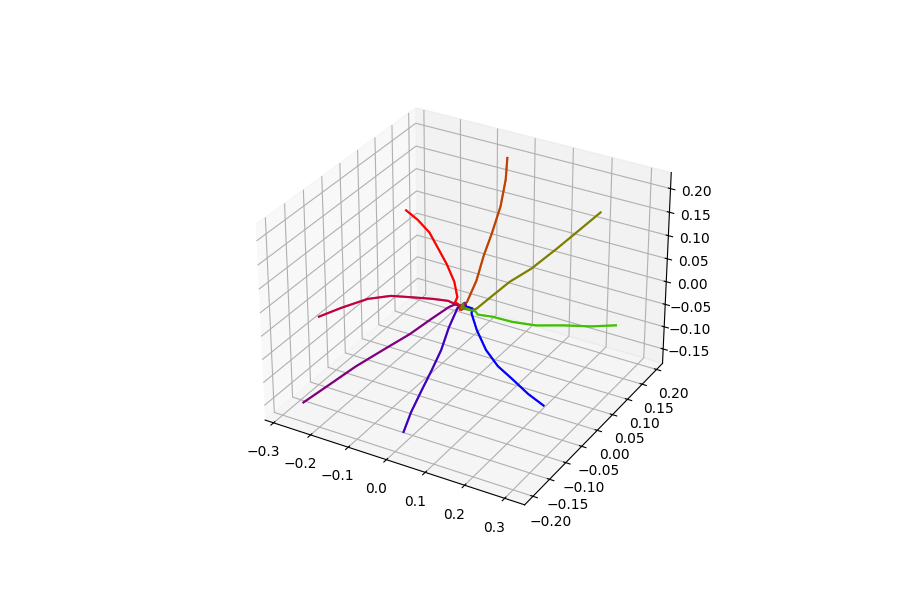

In [50]:
x_1 = Z['ct'][:,:,:].transpose(1,2,0)
x_2 = Z['ct'][:,:,:].transpose(1,2,0)
fig, ax = plot.plot_traj([x_1, x_2],which_times=list(range(0,24)),plot_scatter=0,dim=3)